### Importing The Neccessary Libraries


#### **What**
This code imports various libraries and downloads required datasets for performing tasks related to web scraping, data analysis, visualization, and text processing, including sentiment analysis and natural language processing (NLP).

#### **Why**
The purpose of this setup is to:
- Prepare the environment for text data collection (via web scraping) and preprocessing (using NLP techniques).
- Analyze text data for insights like sentiment, word frequencies, and trends.
- Visualize findings using tools like WordClouds and Seaborn.

#### **How**
1. **Imports**:
   - **`requests`**: Used for making HTTP requests to fetch webpage data.
   - **`BeautifulSoup`**: From the `bs4` library, used for parsing and extracting content from HTML or XML.
   - **`pandas`**: Essential for data manipulation and analysis.
   - **`matplotlib.pyplot`**: Used for creating static visualizations.
   - **`nltk` (Natural Language Toolkit)**:
     - Contains modules for text processing tasks like tokenization, stemming, lemmatization, and sentiment analysis.
   - **`re`**: Provides regular expressions for advanced string manipulation.
   - **`WordCloud`**: Generates visualizations of word frequency.
   - **`seaborn`**: Enhances data visualization with statistical plots.
   - **`TextBlob`**: Simplifies text processing tasks, including sentiment analysis.

2. **`nltk.download()`**:
   - **`vader_lexicon`**: Downloads the lexicon required for sentiment analysis using the VADER sentiment analyzer.
   - **`punkt`**: Provides a pre-trained tokenizer for splitting text into sentences or words.
   - **`stopwords`**: Contains a list of commonly used words (e.g., "the," "is") to exclude from text analysis.
   - **`wordnet`**: Supplies a lexical database for lemmatization, enabling words to be reduced to their base or root form.

3. **Explanation of Features**:
   - **Web scraping (`requests` and `BeautifulSoup`)**: Collects raw data from websites.
   - **Data preprocessing (NLTK, `re`)**: Cleans and prepares text for analysis by removing noise like stopwords, punctuations, and stemming/lemmatization.
   - **Sentiment Analysis (`VADER`, `TextBlob`)**: Detects and interprets the sentiment (positive, neutral, or negative) within text data.
   - **WordCloud and Seaborn**: Visualize text data insights (e.g., frequent terms, sentiment distribution) effectively.

This setup ensures all tools and dependencies for text data analysis are ready to use.


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from textblob import TextBlob


nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

---

## Explanation of the Code Block

#### **What**
This code scrapes user reviews, user biodata, and review titles for British Airways from the *AirlineQuality* website across multiple pages (1–199) and stores the extracted data in a `pandas` DataFrame.

#### **Why**
The purpose of this code is to:
- Collect user-generated content (reviews, biodata, and titles) to perform text analysis, sentiment analysis, or trend detection.
- Organize and save the scraped data for further processing or visualization in a structured format (DataFrame).

#### **How**
1. **Initialization**:
   - **`reviews`, `biodata`, `review_title`**: Empty lists to store scraped data separately for reviews, user biodata, and review titles.

2. **Iterate Through Pages**:
   - A loop (`for i in range(1, 200)`) iterates over page numbers 1 to 199 to scrape reviews from multiple pages.
   - **`url`**: Constructs the URL for each page dynamically by appending the page number to the base URL.

3. **Request and Parse HTML Content**:
   - **`requests.get(url)`**: Sends an HTTP GET request to fetch the HTML content of the page.
   - **`if request_info.status_code == 200`**: Ensures the request was successful before proceeding.
   - **`BeautifulSoup(request_info.text, 'html.parser')`**: Parses the HTML content of the webpage for data extraction.

4. **Data Extraction**:
   - **Reviews**:
     - **`soup.find_all("div", class_="text_content")`**: Finds all `<div>` elements with the class `text_content`, which contain the review text.
     - Loops through the extracted elements to append cleaned review text (`review.text.strip()`) to the `reviews` list.
   - **Biodata**:
     - **`soup.find_all('h3', class_='text_sub_header userStatusWrapper')`**: Extracts user information (e.g., user status or location).
     - The cleaned biodata is appended to the `biodata` list.
   - **Review Titles**:
     - **`soup.find_all('h2', class_="text_header")`**: Extracts the review titles.
     - The cleaned titles are appended to the `review_title` list.

5. **DataFrame Creation**:
   - **`pd.DataFrame({'Biodata': biodata, 'Review_title': review_title, 'Reviews': reviews})`**:
     - Combines the scraped lists into a `pandas` DataFrame with columns:
       - `Biodata`: Stores user details.
       - `Review_title`: Stores the titles of the reviews.
       - `Reviews`: Stores the main review text.

This final DataFrame provide


In [ ]:
import requests
from bs4 import BeautifulSoup

# Initialize empty lists to store the scraped data
reviews = []
biodata = []
review_title = []

# Iterate through pages 1 to 199 to scrape reviews
for i in range(1, 200):
    # Construct the URL for each page
    url = 'https://www.airlinequality.com/airline-reviews/british-airways/page/' + str(i)

    # Send a GET request to the URL
    request_info = requests.get(url)

    # Check if the request was successful
    if request_info.status_code == 200:
        # Instantiate the BeautifulSoup object to parse HTML content
        soup = BeautifulSoup(request_info.text, 'html.parser')

        # Extract review text from the HTML content
        raw_reviews = soup.find_all("div", class_="text_content")
        for review in raw_reviews:
            reviews.append(review.text.strip())

        # Extract user information from the HTML content
        raw_biodata = soup.find_all('h3', class_='text_sub_header userStatusWrapper')
        for bio in raw_biodata:
            biodata.append(bio.text.strip())

        # Extract review titles from the HTML content
        raw_review_title = soup.find_all('h2', class_="text_header")
        for title in raw_review_title:
            review_title.append(title.text.strip())

# Create a DataFrame to store the scraped data
df = pd.DataFrame({'Biodata': biodata, 'Review_title': review_title, 'Reviews': reviews})


In [ ]:
df

,Biodata,Review_title,Reviews
0,Ezra Tan (Singapore) 27th April 2024,"""undiscerning and insincere compensation""",✅ Trip Verified | Paid for a 14 hour long fli...
1,18 reviews\n\n\n\nG Reyes (United Kingdom) 25t...,"""mock and insult your passengers""",✅ Trip Verified | Very inconsiderate PA annou...
2,David Wright (United Kingdom) 22nd April 2024,"""lost my luggage on both flights""","✅ Trip Verified | Absolutely terrible, lost m..."
3,G Han (United States) 20th April 2024,"""the worst experience""",✅ Trip Verified | We booked premium economy r...
4,43 reviews\n\n\n\nEelco van den Heuvel (Nether...,"""The flights were okay""",✅ Trip Verified | We chose Rotterdam and Lond...
...,...,...,...
1985,V Gallam (United Kingdom) 10th January 2017,"""inflight entertainment didn't work""",✅ Verified Review | Travelled British Airways...
1986,I Vounelakis (Greece) 9th January 2017,"""experience was excellent""",✅ Verified Review | Athens to London return. ...
1987,Laurence Ng-Cordell (United Kingdom) 8th Janua...,"""one of the worst airlines""",✅ Verified Review | Manchester to Los Angeles...
1988,Paul Renshaw (United Kingdom) 5th January 2017,"""1 hour in the horrific queue""",✅ Verified Review | Manchester to Las Vegas v...


---

## Data Cleaning

#### **What**
This code performs data cleaning and preprocessing on the scraped reviews DataFrame. It addresses missing values, extracts and processes date information, removes unnecessary text, and organizes the data for further analysis.

#### **Why**
The purpose of this code is to:
- Ensure data quality by handling missing values and redundant text.
- Extract meaningful insights such as dates and months for time-based analysis.
- Prepare the DataFrame for efficient querying and analysis by removing irrelevant columns and standardizing text formats.

#### **How**
1. **Check for Missing Values**:
   - **`df.isnull().sum()`**: Checks for missing values in each column and provides a count to assess data completeness.

2. **Date Extraction**:
   - **`df['Biodata'].str.extract(r'(\d{1,2}\w{2}\s\w+\s\d{4})')`**:
     - Extracts the date (e.g., `1st January 2023`) from the `Biodata` column using a regular expression.
     - Creates a new `Date` column for storing these extracted dates.
   - **`df['Date'].str.split().str[1]`**:
     - Splits the `Date` column into components (day, month, year).
     - Extracts the month (second element) and stores it in a new `Month` column.

3. **Data Information Check**:
   - **`df.info()`**: Provides an overview of the DataFrame, including column data types, non-null counts, and memory usage.

4. **Text Cleaning**:
   - **Reviews**:
     - **`str.replace()`**: Removes redundant prefixes like "✅ Trip Verified | " or "Not Verified | " from the `Reviews` column.
   - **Review Titles**:
     - **`str.replace('"', '')`**: Removes double quotes from the `Review_title` column.

5. **Drop Unnecessary Columns**:
   - **`df.drop(['Biodata', 'Date'], axis=1)`**:
     - Removes the `Biodata` column, which is no longer needed after extracting date information.
     - Removes the `Date` column after extracting the `Month`.

6. **Whitespace Trimming**:
   - **`str.strip()`**: Removes leading and trailing whitespaces from the `Review_title`, `Reviews`, and `Month` columns to standardize the text format.

7. **Display the Cleaned DataFrame**:
   - Shows the final DataFrame structure after applying all preprocessing steps.

This cleaned and processed DataFrame is ready for further exploration, analysis, or visualization.


In [ ]:
# Check for missing values in the DataFrame
df.isnull().sum()

# Extract the date from the 'Biodata' column and create a new 'Date' column
df['Date'] = df['Biodata'].str.extract(r'(\d{1,2}\w{2}\s\w+\s\d{4})')

# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].str.split( ).str[1]
df.info()

# Remove unnecessary text from the 'Reviews' and 'Review_title' columns
df['Reviews'] = df['Reviews'].str.replace('✅ Trip Verified | ', '').str.replace('Not Verified |  ', '').str.replace('Not Verified |', '').str.replace('✅ Verified Review | ', '')
df['Review_title'] = df['Review_title'].str.replace('"','')


# Drop the 'Biodata' and 'Date' columns from the DataFrame
df = df.drop(['Biodata','Date'],axis = 1)

# Strip leading and trailing whitespaces from the 'Review_title', 'Reviews', and 'Month' columns
df['Review_title'] = df['Review_title'].str.strip()
df['Reviews'] = df['Reviews'].str.strip()
df['Month'] = df['Month'].str.strip()

df


In [ ]:
# Check for missing values in the DataFrame
df.isnull().sum()

Biodata         0
Review_title    0
Reviews         0
dtype: int64

In [ ]:
# Extract the date from the 'Biodata' column and create a new 'Date' column
df['Date'] = df['Biodata'].str.extract(r'(\d{1,2}\w{2}\s\w+\s\d{4})')


In [ ]:
# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].str.split( ).str[1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Biodata       1990 non-null   object
 1   Review_title  1990 non-null   object
 2   Reviews       1990 non-null   object
 3   Date          1990 non-null   object
 4   Month         1990 non-null   object
dtypes: object(5)
memory usage: 77.9+ KB


In [ ]:
# Remove unnecessary text from the 'Reviews' and 'Review_title' columns
df['Reviews'] = df['Reviews'].str.replace('✅ Trip Verified | ', '').str.replace('Not Verified |  ', '').str.replace('Not Verified |', '').str.replace('✅ Verified Review | ', '')
df['Review_title'] = df['Review_title'].str.replace('"','')

In [ ]:
# Drop the 'Biodata' and 'Date' columns from the DataFrame
df = df.drop(['Biodata','Date'],axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  1990 non-null   object
 1   Reviews       1990 non-null   object
 2   Month         1990 non-null   object
dtypes: object(3)
memory usage: 46.8+ KB


In [ ]:
# Strip leading and trailing whitespaces from the 'Review_title', 'Reviews', and 'Month' columns
df['Review_title'] = df['Review_title'].str.strip()
df['Reviews'] = df['Reviews'].str.strip()
df['Month'] = df['Month'].str.strip()

df


,Review_title,Reviews,Month
0,undiscerning and insincere compensation,Paid for a 14 hour long flight ticket which in...,April
1,mock and insult your passengers,Very inconsiderate PA announcements were made ...,April
2,lost my luggage on both flights,"Absolutely terrible, lost my luggage on both f...",April
3,the worst experience,We booked premium economy round trip from Phoe...,April
4,The flights were okay,We chose Rotterdam and London City airport bec...,April
...,...,...,...
1985,inflight entertainment didn't work,Travelled British Airways from London to Kuala...,January
1986,experience was excellent,Athens to London return. entire experience was...,January
1987,one of the worst airlines,Manchester to Los Angeles via Heathrow. I'm al...,January
1988,1 hour in the horrific queue,Manchester to Las Vegas via Manchester. I went...,January


# **Text Preprocessing**

This code block defines a function preprocessing_text() for cleaning and processing text data. Here's a breakdown of the steps:

**Lowercasing**: It converts the text to lowercase using the lower() method.


**Removing Unnecessary Characters**: It removes unnecessary characters such as punctuation and special symbols using regular expressions.

**Tokenization**: It tokenizes the text using the word_tokenize() function from NLTK.

**Removing Stop Words**: It removes common stop words from the tokens using the stopwords corpus from NLTK.

**Lemmatization:** It lemmatizes the tokens to their base forms using the WordNet lemmatizer from NLTK.

**Applying the Function:** It applies the preprocessing function to the 'Reviews' column of the DataFrame and creates a new column 'cleaned_reviews' containing the preprocessed text.

**Joining Tokens**: It joins the preprocessed tokens back into cleaned reviews as strings and overwrites the 'cleaned_reviews' column with the joined tokens.

**Displaying the DataFrame**: It displays the DataFrame with the cleaned reviews in the 'cleaned_reviews' column.




In [ ]:
#creating function for cleaning and processing the tokens
def preprocessing_text(text):

  #lowercasing
  text = text.lower()

  #Removing unneccesary characters
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  #tokenize
  tokens = word_tokenize(text)

  #Removing stop words
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word not in stop_words]

  #lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

  return lemmatized_tokens





In [ ]:
#apply the preprocessing function to the 'Reviews' column and create a new column 'cleaned_reviews'
df['cleaned_reviews'] = df['Reviews'].apply(preprocessing_text)


# Join the preprocessed tokens to form cleaned reviews and overwrite the 'cleaned_reviews' column
df['cleaned_reviews']  = df['cleaned_reviews'].map(" ".join)

df

## Sentiment Analysis With NLTK

#### **What**
This section of the code applies sentiment analysis to the cleaned review titles. It preprocesses the text in the `Review_title` column, generates sentiment scores (positive, negative, and neutral), and creates a new DataFrame to store these insights alongside the original and processed titles.

#### **Why**
The objective of this code is to:
- Preprocess and standardize the review titles for accurate sentiment analysis.
- Identify the sentiment expressed in each review title, which could provide insights into customer experiences.
- Structure the data for further sentiment-based analysis or visualization.

#### **How**
1. **Preprocessing the Review Titles**:
   - **`df['cleaned_review_title'] = df['Review_title'].apply(preprocessing_text)`**:
     - Applies the `preprocessing_text` function to clean and normalize the text in the `Review_title` column.
   - **`df['cleaned_review_title'] = df['cleaned_review_title'].map(" ".join)`**:
     - Converts the list of words (resulting from the preprocessing function) back into a single string for each review title.

2. **Sentiment Analysis**:
   - Initializes a sentiment analyzer (`sentiments`) to compute the polarity scores of each cleaned review title.
   - **`df["Positive_title"]`**:
     - Extracts the positive sentiment score for each cleaned review title using `sentiments.polarity_scores(i)["pos"]`.
   - **`df["Negative_title"]`**:
     - Extracts the negative sentiment score for each cleaned review title using `sentiments.polarity_scores(i)["neg"]`.
   - **`df["Neutral_title"]`**:
     - Extracts the neutral sentiment score for each cleaned review title using `sentiments.polarity_scores(i)["neu"]`.

3. **Creating a Sentiment-Focused DataFrame**:
   - **`df_reviews_title_nltk`**:
     - Creates a new DataFrame that includes the original review titles, the cleaned review titles, and the computed sentiment scores (positive, negative, neutral).

This process provides a structured way to assess customer sentiment based on their review titles, enabling targeted insights and actionable outcomes.


In [ ]:
#initailizing sentiment analyzer
sentiments = SentimentIntensityAnalyzer()

#Creating a sentiment for each row of reviews
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Reviews"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Reviews"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Reviews"]]

# Create a new DataFrame containing the reviews and their corresponding sentiment scores
df_reviews_nltk = df[["Reviews", "Positive", "Negative", "Neutral"]]

df_reviews_nltk

In [ ]:

df['cleaned_review_title'] = df['Review_title'].apply(preprocessing_text)
df['cleaned_review_title']  = df['cleaned_review_title'].map(" ".join)

#Creating a sentiment for each row of reviews
df["Positive_title"] = [sentiments.polarity_scores(i)["pos"] for i in df['cleaned_review_title']]
df["Negative_title"] = [sentiments.polarity_scores(i)["neg"] for i in df["cleaned_review_title"]]
df["Neutral_title"] = [sentiments.polarity_scores(i)["neu"] for i in df["cleaned_review_title"]]

df_reviews_title_nltk = df[["Review_title",'cleaned_review_title', "Positive_title", "Negative_title", "Neutral_title"]]



## **Visualizing Sentiment Analysis Results**

#### **What**
This code visualizes customer sentiment from cleaned review texts and titles using word clouds and bar charts. It highlights positive, negative, and neutral sentiment distributions for both reviews and review titles.

#### **Why**
The goal is to:
- Represent sentiments visually using word clouds for quick interpretation.
- Summarize and compare overall sentiment distributions through bar charts.
- Provide insights into customer feedback trends.

#### **How**

1. **Positive Sentiment Word Cloud (Reviews)**:
   - **`positive = ' '.join(...)`**:
     - Filters cleaned reviews with a higher positive score than negative.
     - Joins the filtered reviews into a single string for word cloud generation.
   - **`WordCloud(...)`**:
     - Creates a word cloud excluding stopwords and with a white background.
   - **`plt.imshow(...)`**:
     - Displays the word cloud.

2. **Negative Sentiment Word Cloud (Reviews)**:
   - Similar logic is applied to create a word cloud for negative sentiment reviews.

3. **Aggregate Sentiment (Reviews)**:
   - **`total_positive = df['Positive'].sum()`**:
     - Sums up the positive sentiment scores across all reviews.
   - Similar calculations for `total_negative` and `total_neutral`.
   - **`sns.barplot(...)`**:
     - Visualizes aggregate positive, negative, and neutral sentiment using a bar plot.

4. **Aggregate Sentiment (Titles)**:
   - Same as above but applied to the sentiment scores from `cleaned_review_title`.

5. **Customizations**:
   - **`plt.figure(figsize=(15,10))`**:
     - Sets the figure size for better visualization.
   - **`palette="Set2"`**:
     - Applies a visually appealing color palette.

#### **Outcome**
- **Word Clouds**:
  - Show prominent words associated with positive or negative sentiments in reviews.
- **Bar Charts**:
  - Display overall sentiment scores for reviews and titles, allowing comparison and identifying customer sentiment trends.


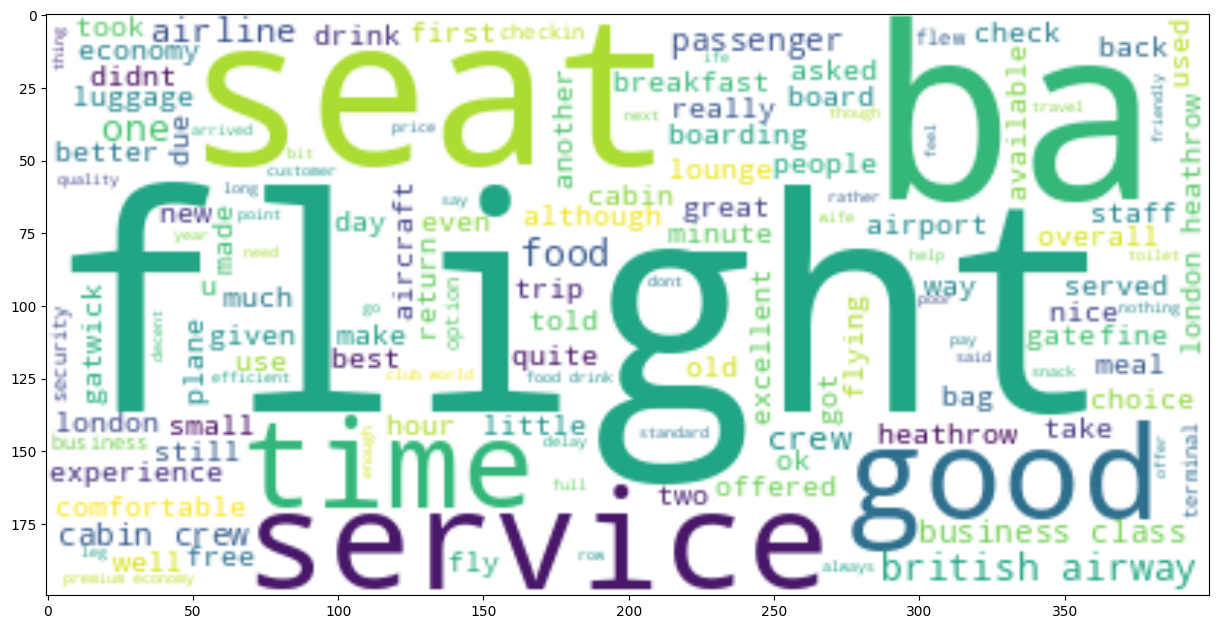

In [ ]:
positive =' '.join([i for i in df['cleaned_reviews'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

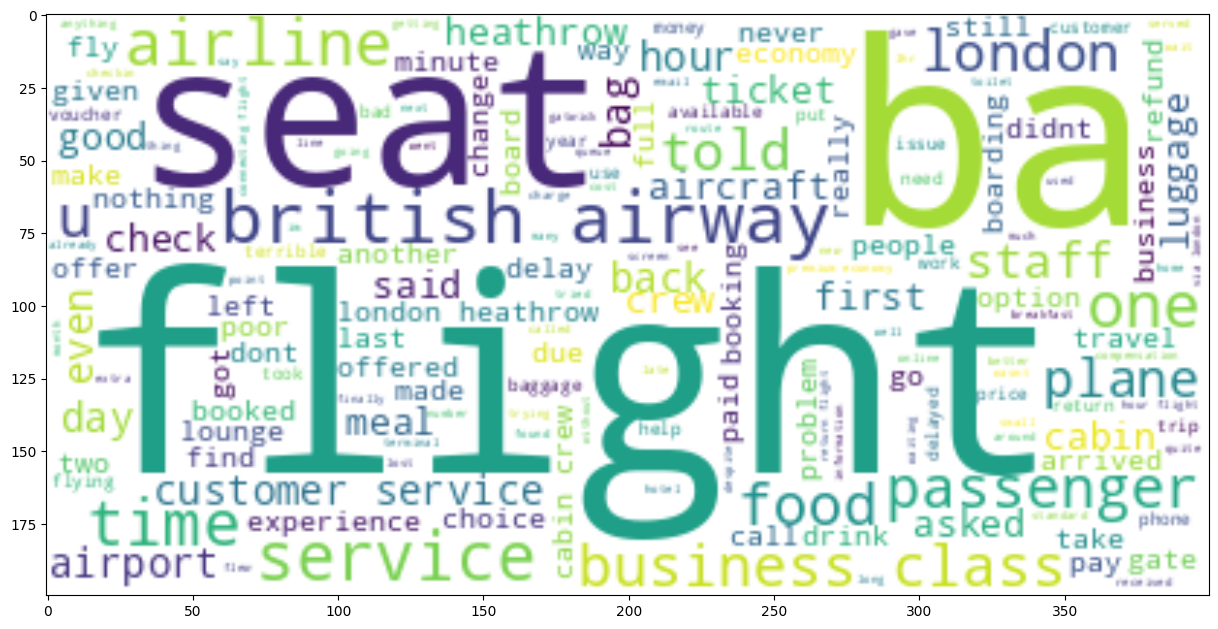

In [ ]:
positive =' '.join([i for i in df['cleaned_reviews'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

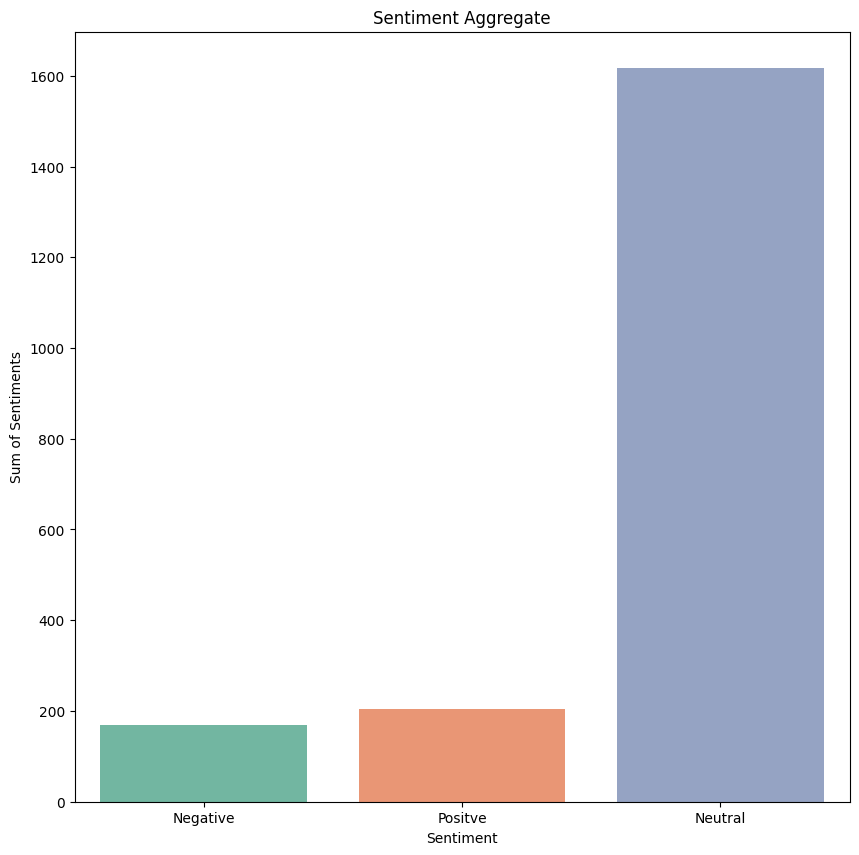

In [ ]:
total_positive = df['Positive'].sum()
total_negative = df['Negative'].sum()
total_neutral = df['Neutral'].sum()

values = [total_negative,total_positive,total_neutral]
labels = ['Negative', 'Positve', 'Neutral']

plt.figure(figsize=(10,10))
sns.barplot(x=labels, y= values, palette='Set2', hue=labels)
plt.title('Sentiment Aggregate')
plt.xlabel('Sentiment')
plt.ylabel('Sum of Sentiments');


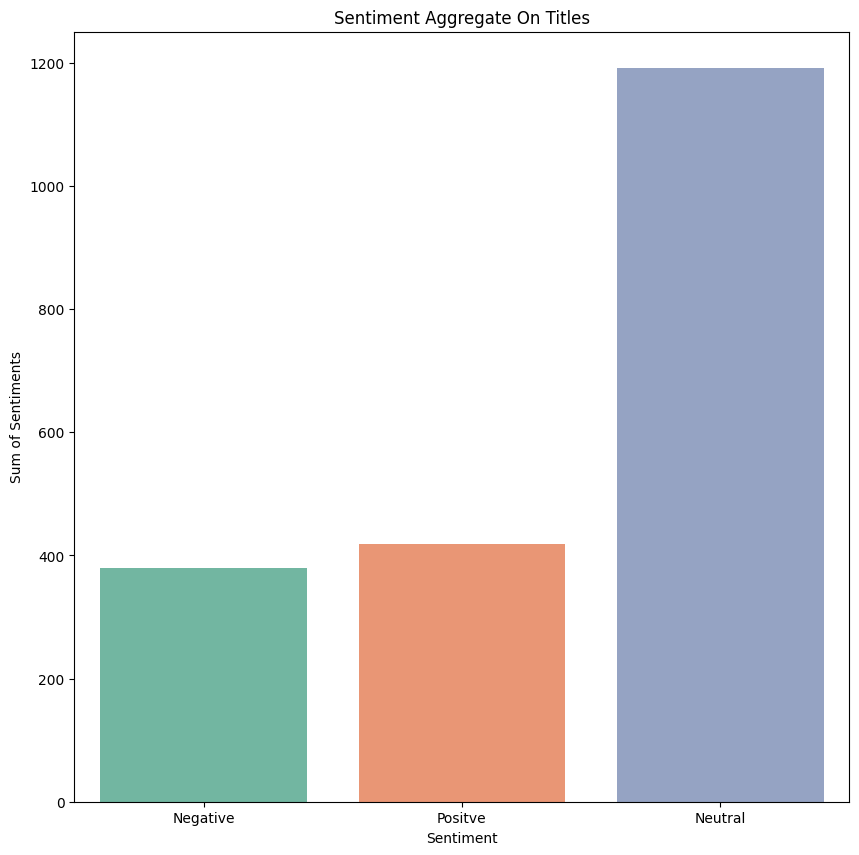

In [ ]:
total_positive_title = df['Positive_title'].sum()
total_negative_title = df['Negative_title'].sum()
total_neutral_title = df['Neutral_title'].sum()

values = [total_negative_title,total_positive_title,total_neutral_title]
labels = ['Negative', 'Positve', 'Neutral']

plt.figure(figsize=(10,10))
sns.barplot(x=labels, y=values, hue=labels, palette="Set2")
plt.title('Sentiment Aggregate On Titles')
plt.xlabel('Sentiment')
plt.ylabel('Sum of Sentiments');


#**Sentiment Analysis Using TextBlob**



## What:
This code performs sentiment analysis on a dataset of cleaned textual reviews using the TextBlob library. The sentiment of each review is categorized as **Positive**, **Negative**, or **Neutral** based on its polarity score. Additionally, the code calculates the cumulative sentiment values for each sentiment category and visualizes the results using a bar plot.

## Why:
- **To understand customer feedback**: Sentiment analysis helps to classify reviews into categories such as Positive, Negative, or Neutral, providing insights into customer opinions.
- **To summarize sentiment**: Calculating the total sentiment score for each category allows you to quantify and compare the overall sentiment in the dataset.
- **To visualize the sentiment distribution**: Using a bar plot helps to visually interpret the sentiment trends in the reviews, making it easier to grasp the sentiment distribution at a glance.

## How:

In [ ]:
def sentiment_marking(text):
    """
    Perform sentiment analysis on the given text using TextBlob.

    Parameters:
    text (str): The text to analyze for sentiment.

    Returns:
    str: A sentiment label ('Positive', 'Negative', or 'Neutral') based on the sentiment polarity score.
    """

    # Create a TextBlob object for the given text
    blob = TextBlob(text)

    # Get the sentiment polarity score
    senti_score = blob.sentiment.polarity

    # Determine the sentiment label based on the polarity score
    if senti_score > 0.1:
        return 'Positive',senti_score

    elif senti_score <= -0.1:
        return 'Negative', senti_score

    else:
        return 'Neutral',senti_score

In [ ]:
#Creating 2 new columns that will contain the textblob category and value.
df['Textblob_score'], df['Textblob_values'] = zip(*df['cleaned_reviews'].map(sentiment_marking))

In [ ]:
def calculate_textblob(df, status):
    """
    Calculate the sum of TextBlob values for a given sentiment status.

    Parameters:
    df (pandas.DataFrame): DataFrame containing 'Textblob_score' and 'Textblob_values' columns.
    status (str): Sentiment status ('Neutral', 'Positive', or 'Negative').

    Returns:
    float: The sum of TextBlob values for the specified sentiment status.
    """
    # Filter rows based on the specified sentiment status
    filtered_df = df[df['Textblob_score'] == status]

    # Extract TextBlob values for the filtered rows
    textblob_values = filtered_df['Textblob_values']

    # Calculate the sum of TextBlob values
    total_sum = textblob_values.sum()

    return abs(total_sum)

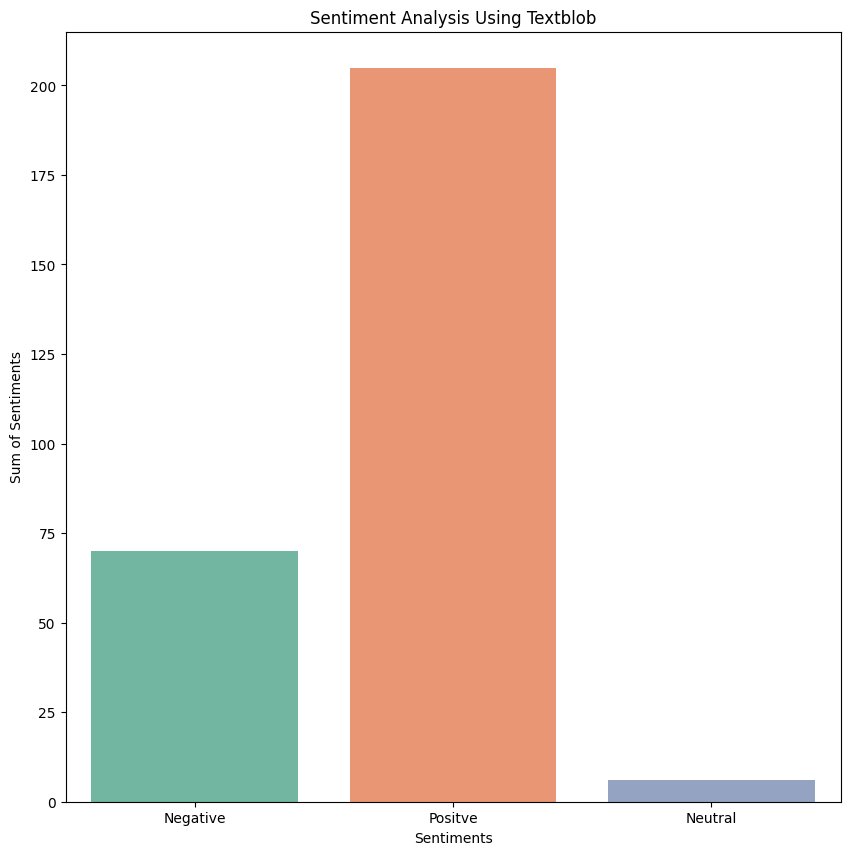

In [ ]:
total_positive_textblob = calculate_textblob(df, status='Positive')
total_negative_textblob = calculate_textblob(df, status='Negative')
total_neutral_textblob = calculate_textblob(df, status='Neutral')

values = [total_negative_textblob,total_positive_textblob,total_neutral_textblob]
labels = ['Negative', 'Positve', 'Neutral']

plt.figure(figsize=(10,10))
sns.barplot(x=labels, y=values, hue=labels, palette="Set2")
plt.title('Sentiment Analysis Using Textblob')
plt.xlabel('Sentiments')
plt.ylabel('Sum of Sentiments');


## **Summary**

The objective of this project was to understand the public sentiment of the British Airways. The data was gotten from scraping Airlinequality.com. The data was cleaed of unwanted data, stopwords were removed, and lematized to help in creating the wordcloud visualization. I used NLTK and textblob to understand the sentiment.
Using NLTK, i found that the difference between positive and negative sentiments weren't significant. Neutral sentiment seemed to be the most.

While in Textblob the positive sentiment were more positive, showing a significant difference between the positive and negative sentiments, with neutral sentiment very little.

We can conclude that the sentiment towards the British Airways is positive.

I acknowledge Forage and the British Airways for making this sprint possible.